In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, test_size=.3,
                                                    shuffle=True)

In [ ]:
print(X_train.shape)
print(28 * 28)

(60000, 28, 28)
784


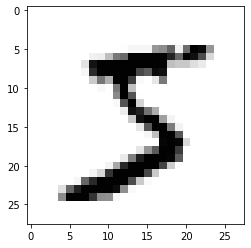

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

In [ ]:
X_train = X_train.reshape(-1, 784).astype('float')
X_valid = X_valid.reshape(-1, 784).astype('float')
X_test = X_test.reshape(-1, 784).astype('float')

X_train /= 255.0
X_valid /= 255.0
X_test /= 255.0

n_classes=10

y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
input_shape = (784, )

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=input_shape))
# model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(patience=2)

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', 
              metrics=['accuracy'])

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
          callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0520 - accuracy: 0.6910 - val_loss: 0.5331 - val_accuracy: 0.8696
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4531 - accuracy: 0.8780 - val_loss: 0.3783 - val_accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3718 - accuracy: 0.8955 - val_loss: 0.3348 - val_accuracy: 0.9037
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3405 - accuracy: 0.9027 - val_loss: 0.3168 - val_accuracy: 0.9088
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3220 - accuracy: 0.9080 - val_loss: 0.3072 - val_accuracy: 0.9119
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3094 - accuracy: 0.9116 - val_loss: 0.2974 - val_accuracy: 0.9139
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.9149 - val_loss: 0.2917 - val_accuracy

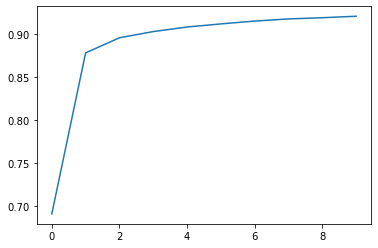

In [ ]:
plt.subplot(111)

epochs = list(range(10))
plt.plot(epochs, history.history['accuracy'])

1/1 [==============================] - 0s 21ms/step
[[8.3427025e-05 2.5287999e-10 1.9966759e-04 7.3029972e-03 4.9436998e-08
  8.8185470e-06 2.7523117e-09 9.9230909e-01 4.3125106e-06 9.1536087e-05]]
7


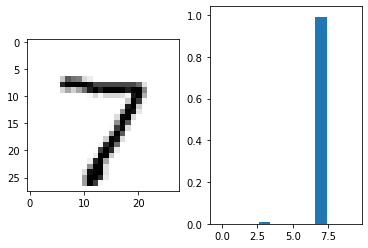

In [ ]:
pred = model.predict(X_valid[0].reshape(1, 784))
plt.subplot(121)
plt.imshow(X_valid[0].reshape(28, 28), cmap='Greys')
print(pred)

plt.subplot(122)
plt.bar(range(10), pred[0])
print(np.argmax(pred))

#### Tuning Hyperparameters 

We can set hyperparameters to many different values. To find the most optimal ones, we can try using random search and test those on validation set or k-fold-cross validation.

In [ ]:
from sklearn.datasets import fetch_california_housing
from models import build_model

In [ ]:
housing = fetch_california_housing()

In [ ]:
print(housing['data'].shape)
print(housing['target'].shape)

(20640, 8)
(20640,)


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,
                                                    shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                    y_train_full,
                                                    shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)
_ = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\julia\AppData\Local\Temp\ipykernel_18100\2189228328.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
keras_reg.fit(X_train, y_train, epochs=10, 
              validation_data=(X_valid, y_valid), 
              callbacks=[EarlyStopping(patience=2)])

mse_test = keras_reg.score(X_test, y_test)


Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 2s 3ms/step - loss: 3841098937251648887586816.0000 - val_loss: 798959825256267644928.0000
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 181727088324770791424.0000 - val_loss: 10116756020748353536.0000
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 2301096142638678016.0000 - val_loss: 128101926498729984.0000
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 29137371668676608.0000 - val_loss: 1622073050923008.0000
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 368948226818048.0000 - val_loss: 20539345207296.0000
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 4671770460160.0000 - val_loss: 260076601344.0000
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 59155619840.0000 - val_loss: 3293190912.0000
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 749050944.0000 - va

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

params_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.array([10, 20]),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search = RandomizedSearchCV(keras_reg, 
                                params_distribs, 
                                n_iter=10, cv=3)
rnd_search.fit(X_train, y_train, epochs=10, 
validation_data=(X_valid, y_valid),
callbacks=[EarlyStopping(patience=2)]
)

Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3342082140857696256.0000 - val_loss: 308962633187328.0000
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 55921388552192.0000 - val_loss: 1176949227520.0000
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 213025079296.0000 - val_loss: 4483428352.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 811489216.0000 - val_loss: 17078916.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 3091237.7500 - val_loss: 65048.5430
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 11776.7412 - val_loss: 249.3193
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 46.2595 - val_loss: 2.2576
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 1.4818 - val_loss: 1.3311
Epoch 9/10
242/242 [==============================] - 1s 3ms/step - loss: 1.3128 - val_loss: 1.3300
Ep

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 7682742272.0000 - val_loss: 226636.4688
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 187567.6406 - val_loss: 152986.3125
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 126612.9688 - val_loss: 103270.8750
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 85467.0234 - val_loss: 69711.3750
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 57692.5742 - val_loss: 47057.8711
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 38944.2500 - val_loss: 31766.1543
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 26288.6719 - val_loss: 21443.7520
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 17745.8906 - val_loss: 14475.8730
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 11979.3174 - val_loss: 9772.2832
Epoch 10/10
121/121 [=========

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan     
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 198291073531904.0000 - val_loss: 5195089920.0000
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 713182720.0000 - val_loss: 3189846.2500
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 437906.8438 - val_loss: 1959.9922
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 270.1742 - val_loss: 2.5099
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 1.4806 - val_loss: 1.3302
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 1.3129 - val_loss: 1.3295
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 1.3128 - val_loss: 1.3292
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 1.3129 - val_loss: 1.3294
Epoch 9/10
121/121 [==============================] - 0s 1ms/step - loss: 1.3417
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 6571870057763846600405848948736.0000 - val_loss: 214971622373424210546524160.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 29511366341066600250081280.0000 - val_loss: 131993443434013520822272.0000
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 18120083356037580587008.0000 - val_loss: 81044518298252738560.0000
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 11125792135209549824.0000 - val_loss: 49761692954918912.0000
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 6831282386370560.0000 - val_loss: 30553843695616.0000
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 4194431139840.0000 - val_loss: 18760165376.0000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 2575397120.0000 - val_loss: 11518877.0000
Epoch 8/10
242/242 [==============================] - 1s 3ms/step

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 10388043.0000 - val_loss: 986.5223
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 814.6489 - val_loss: 661.6744
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 546.5528 - val_loss: 443.9310
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 366.8295 - val_loss: 297.9704
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 246.3490 - val_loss: 200.1398
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 165.5798 - val_loss: 134.5603
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 111.4331 - val_loss: 90.6079
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 75.1339 - val_loss: 61.1473
Epoch 9/10
242/242 [==============================] - 1s 3ms/step - loss: 50.8007 - val_loss: 41.4063
Epoch 10/10
121/121 [==============================] - 0s 2ms/step - loss: 

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: inf - val_loss: 56550135912429013535301810220171264.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: inf - val_loss: 37909727501005392937220207506620416.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 31275205737902311580826733473955840.0000 - val_loss: 25413723059971221649375666957713408.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 20966089225027885959126340419452928.0000 - val_loss: 17036699180490746154879133851582464.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 14055108216471514908981844166836224.0000 - val_loss: 11420917889796861358868945914822656.0000
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 9422174564687786357664517118230528.0000 - val_loss: 7656298283458625311900950230728704.0000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 63163

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 2s 4ms/step - loss: inf - val_loss: 89532320845167667901234570854400.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 47461421851788422027491114221568.0000 - val_loss: 21052253565582266282400144162816.0000
Epoch 3/10
242/242 [==============================] - 1s 4ms/step - loss: 11159880756281890578827116019712.0000 - val_loss: 4950143823320696340389914738688.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 2624090757278055242729701507072.0000 - val_loss: 1163956045860876746836808826880.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 617017642222944374289573347328.0000 - val_loss: 273688149618577954504305541120.0000
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 145083045940957161167131770880.0000 - val_loss: 64353959520342915626383179776.0000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 34114243245

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2391056056320.0000 - val_loss: 391.4866
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 20.3262 - val_loss: 1.3292
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 1.3332 - val_loss: 1.3293
Epoch 4/10
121/121 [==============================] - 0s 2ms/step - loss: 1.3017
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: inf - val_loss: 29592361847613765073909609136128.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 25070655290135395239889689640960.0000 - val_loss: 20999498460665923094474316054528.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 17790784475206248943777629601792.0000 - val_loss: 14901813235147349990353106108416.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 12624809916383933242198246555648.0000 - val_loss: 10574715929333084316989862707200.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 8958888648426743640031907282944.0000 - val_loss: 7504083637601063688684353617920.0000
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 6357453765471176355350786867200.0000 - val_loss: 5325086121645075505779161694208.0000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 451

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 3ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1310082859008.0000 - val_loss: 549511488.0000
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 328232544.0000 - val_loss: 175103808.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 104592456.0000 - val_loss: 55797372.0000
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 33328778.0000 - val_loss: 17780012.0000
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 10620342.0000 - val_loss: 5665650.5000
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 3384215.7500 - val_loss: 1805373.3750
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 1078394.8750 - val_loss: 575284.0625
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 343635.1562 - val_loss: 183314.1406
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 109501.4375 - val_loss: 58

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 70606139905015808.0000 - val_loss: 21837484392448.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 13043875446784.0000 - val_loss: 6958585741312.0000
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 4156477145088.0000 - val_loss: 2217377005568.0000
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 1324475088896.0000 - val_loss: 706574942208.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 422048399360.0000 - val_loss: 225152286720.0000
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 134487146496.0000 - val_loss: 71745560576.0000
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 42854776832.0000 - val_loss: 22861938688.0000
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 13655810048.0000 - val_loss: 7285026816.0000
Epoch 9/10
242/242 [========

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 295044288348160.0000 - val_loss: 70809788416.0000
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 42295832576.0000 - val_loss: 22563782656.0000
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 13477720064.0000 - val_loss: 7190028288.0000
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 4294722048.0000 - val_loss: 2291126272.0000
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 1368527232.0000 - val_loss: 730074688.0000
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 436085888.0000 - val_loss: 232640576.0000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 138960320.0000 - val_loss: 74131776.0000
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 44280216.0000 - val_loss: 23622312.0000
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - 

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan -2.47379806e+08]
  warnings.warn(


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 803319275610701824.0000 - val_loss: 821335118839808.0000
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 393713041801216.0000 - val_loss: 147740214427648.0000
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 70820277780480.0000 - val_loss: 26575181447168.0000
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 12738999877632.0000 - val_loss: 4780297027584.0000
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 2291467550720.0000 - val_loss: 859868561408.0000
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 412184707072.0000 - val_loss: 154671497216.0000
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 74143031296.0000 - val_loss: 27822069760.0000
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 13336684544.0000 - val_loss: 5004572672.0000
Epoch 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000026E0F3D4880>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E0F3D52D0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([10, 20])})

In [ ]:
rnd_search.best_params_

{'learning_rate': 0.0011800629361042776, 'n_hidden': 1, 'n_neurons': 10}

In [2]:
import pandas as pd

In [9]:
season_data = pd.read_csv('./data/games_tourney.csv')

In [10]:
season_data.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [7]:
print(season_data.shape)

(312178, 8)


In [11]:
X = season_data['seed_diff']
y = season_data['score_diff']

When it comes to choosing appropriate train and test sample sizes
1. If you have very small dataset, you should use cross validation
2. If the dataset is large enough, you may use 80/20 split (Pareto rule). The training set may be further split to test the performance on the validation set. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)

model.compile(optimizer='sgd', loss='mae')


In [25]:
history = model.fit(X_train, y_train, 
          batch_size=64, 
          validation_split=.2,
          verbose=True,
          epochs=10)


Epoch 1/10
38/38 [==============================] - 1s 12ms/step - loss: 11.5469 - accuracy: 0.0110 - val_loss: 8.9748 - val_accuracy: 0.0169
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 9.4053 - accuracy: 0.0148 - val_loss: 8.5434 - val_accuracy: 0.0169
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 9.2402 - accuracy: 0.0148 - val_loss: 8.5598 - val_accuracy: 0.0169
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 9.2350 - accuracy: 0.0148 - val_loss: 8.5528 - val_accuracy: 0.0169
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 9.2350 - accuracy: 0.0148 - val_loss: 8.5844 - val_accuracy: 0.0169
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 9.2372 - accuracy: 0.0148 - val_loss: 8.5637 - val_accuracy: 0.0169
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 9.2341 - accuracy: 0.0148 - val_loss: 8.5704 - val_accuracy: 0.0169
Epoch 8/10
38/38 [

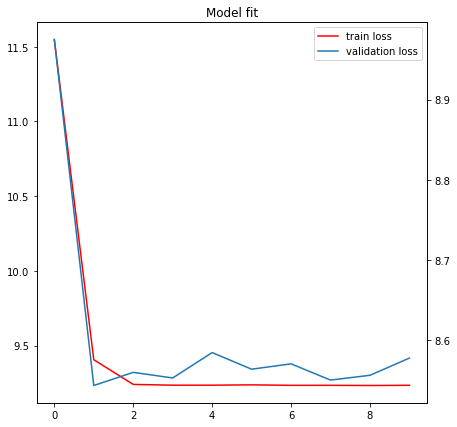

In [34]:
_, ax = plt.subplots(figsize=(7, 7))

l1, = ax.plot(np.arange(10), history.history['loss'], c='red')

twin_ax = ax.twinx()
l2, = twin_ax.plot(np.arange(10), history.history['val_loss'])

plt.legend([l1, l2], ['train loss', 'validation loss'])

_ = plt.title('Model fit')

In [35]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 2ms/step - loss: 9.2563 - accuracy: 0.0087


[9.256316184997559, 0.00865460280328989]